# Generating 1D TOY function for Studying the Piyavskii’s algorithm

When it comes to safety critical AI, recent works have highlighted the huge interest of proving global properties 
of an AI Model. Since most AI Models can be expressed as a **Lipschitz** function, **global optimization** using the knowledge
of the Lipschitz constant or some upper bound of it,  is one solution to bound the extreme values of the AI Model.

However, the runtime complexity or sample complexity inherent with some Lipschitz optimization technique is still
a research topic. The goal of this notebook is to generate some well studied 1D function with **known Lipschitz constant**
in order to analyze the complexity of *Lipschitz optimization* on those functions.

### Import

In [1]:
import numpy as np # for sampling points
import sys # necessary for local path. If you install the library, it can be removed
sys.path.append('..') 
import lipschitz_opt
import matplotlib.pyplot as plt # visualization
from ipywidgets import interact, widgets # for playing with the hyperparameters on the functions

In [2]:
from lipschitz_opt.application import Func1D_0, Func1D_composite

## 1) Simple function: f(x) = d-c|x-a|^b

The first function under study is f(x) = d-c|x-a|^b. Both hyperparameters **(a,b,c, d)** are real values than can be
set by the users and are set to 1 if not provided by the users. Extra options include the domain of definition: **x_min** and **x_max** that are respectively set to 0.and 1. if not provided
<img src="./data/function_1_example.png" alt="Simple 1D Function!" width="400"/>

We first start by creating one toy function: *f* and plot the results on the domain

Text(0.5, 1.0, 'f(x)= 1.0-1.0*|x-0.5|^1.0 for 0.0<=x<=1.0')

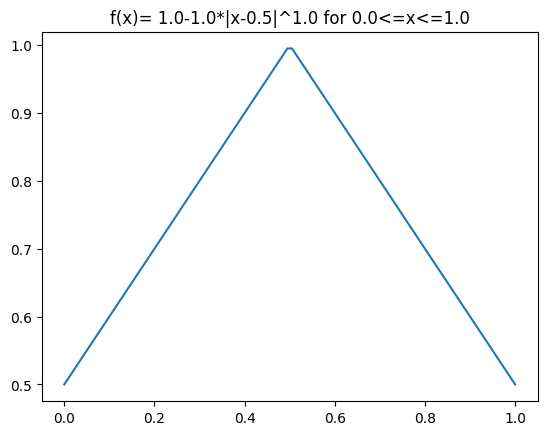

In [3]:
f = Func1D_0(a=0.5)
x = np.linspace(f.x_min, f.x_max, 100) # samples for visualization
y =f(x) # output

plt.plot(x, y)
plt.title('f(x)= {}-{}*|x-{}|^{} for {}<=x<={}'.format(f.d, f.c, f.a, f.b, f.x_min, f.x_max))

We also propose an off-the-shelf method to approximate the Lipschitz constant based on an Lp norm. However, note that
this lipschitz constant is based on sampling the gradient of the function using auto-differentation. Therefore, there
may be some numerical errors.

In [4]:
L = f.lipschitz()
print('approximation of the Lipschitz constant for infinite norm is {}'.format(L))

approximation of the Lipschitz constant for infinite norm is 1.0


The next cell is interactive in order to play with all the hyperparameters of the function

In [5]:
def play_0(a, b, c, d):
    
    x_min=0.
    x_max=1.
    f_ = Func1D_0(a=a, b=b, c=c, d=d, x_min=x_min, x_max=x_max)
    x = np.linspace(f.x_min, f.x_max, 100)
    y = f_(x)
    L = f_.lipschitz()
    plt.plot(x, y)
    plt.title('f(x)= {}-{}*|x-{}|^{} for {}<=x<={}, Lipschitz = {}'.format(f.d, f.c, f.a, f.b, f.x_min, f.x_max, L))
    
interact(play_0, 
         a = widgets.FloatSlider(value=0.5, min=0., max=1, step=0.1, continuous_update=False),
         b = widgets.FloatSlider(value=1., min=1., max=4, step=0.1, continuous_update=False),
         c = widgets.FloatSlider(value=1., min=-3., max=3, step=0.1, continuous_update=False),
         d = widgets.FloatSlider(value=1., min=-3., max=3, step=0.1, continuous_update=False)
        )
    

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='a', max=1.0), FloatSlider(v…

<function __main__.play_0(a, b, c, d)>

## 2) Composition function:

The next function is a composition between two simple functions. It takes as input a list of simple 1d functions and the name of an operator that will combine the simple functions. Among the possible operators, the current ones implemented are **max**, **min**, **sum**, **mean**. All the listed simple functions should be define on the same domain x_min, x_max. If not, an error will be raised. 
<img src="./data/function_2_example.png" alt="Compositive of two 1D Function!" width="400"/>

We first start by creating one composited function: *f* from two simple functions f_0 and f_12. We also plot the results on the domain of every functions.

In [6]:
f_0 = Func1D_0(a=0.25, c=1.)
f_1 = Func1D_0(a=0.75, b=2, c=0.6)
f_2 = Func1D_composite([f_0,f_1], op='max')

In [7]:
y_0 = f_0(x)
y_1 = f_1(x)
y_2 = f_2(x)

Text(0.5, 1.0, 'f(x)= max(1.0-1.0*|x-0.25|^1.0, 1.0-0.6*|x-0.75|^2)')

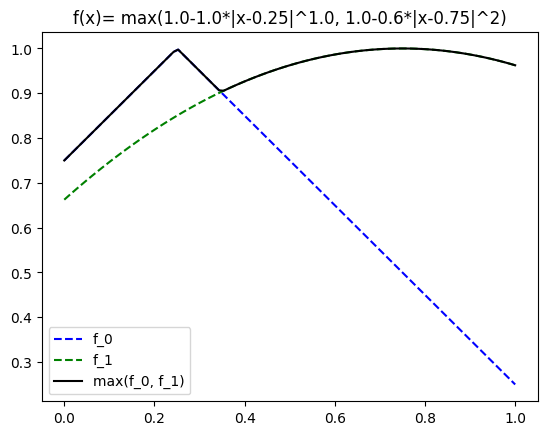

In [8]:
plt.plot(x, y_0, '--', c='blue')
plt.plot(x, y_1, '--', c='green')
plt.plot(x, y_2, '-', c='k')
plt.legend(['f_0', 'f_1', 'max(f_0, f_1)'])
plt.title('f(x)= max({}-{}*|x-{}|^{}, {}-{}*|x-{}|^{})'.format(f_0.d, f_0.c, f_0.a, f_0.b, f_1.d, f_1.c, f_1.a, f_1.b))

In [9]:
L = f_2.lipschitz()
print('approximation of the Lipschitz constant for infinite norm is {}'.format(L))

approximation of the Lipschitz constant for infinite norm is 1.0


The next cell is interactive in order to play with all the hyperparameters of the function

In [10]:
def play_1(a_0, b_0, c_0, d_0, a_1, b_1, c_1, d_1):
    
    x_min=0.
    x_max=1.
    f_0 = Func1D_0(a=a_0, b=b_0, c=c_0, d=d_0, x_min=x_min, x_max=x_max)
    f_1 = Func1D_0(a=a_1, b=b_1, c=c_1, d=d_1, x_min=x_min, x_max=x_max)
    f_ = Func1D_composite([f_0, f_1])
    x = np.linspace(f.x_min, f.x_max, 100)
    y = f_(x)
    y_0 = f_0(x)
    y_1 = f_1(x)
    L = f_.lipschitz()
    plt.plot(x, y_0, '--', c='blue')
    plt.plot(x, y_1, '--', c='green')
    plt.plot(x, y, '-', c='k')
    plt.legend(['f_0', 'f_1', 'max(f_0, f_1)'])
    plt.title('f(x)= max({}-{}*|x-{}|^{}, {}-{}*|x-{}|^{}), Lipschitz={}'.format(f_0.d, f_0.c, f_0.a, f_0.b, f_1.d, f_1.c, f_1.a, f_1.b,L))

   
interact(play_1, 
         a_0 = widgets.FloatSlider(value=0.25, min=0., max=1, step=0.1, continuous_update=False),
         b_0 = widgets.FloatSlider(value=1., min=1., max=4, step=0.1, continuous_update=False),
         c_0 = widgets.FloatSlider(value=1., min=-3., max=3, step=0.1, continuous_update=False),
         d_0 = widgets.FloatSlider(value=1., min=-3., max=3, step=0.1, continuous_update=False),
         a_1 = widgets.FloatSlider(value=0.75, min=0., max=1, step=0.1, continuous_update=False),
         b_1 = widgets.FloatSlider(value=2., min=1., max=4, step=0.1, continuous_update=False),
         c_1 = widgets.FloatSlider(value=0.6, min=-3., max=3, step=0.1, continuous_update=False),
         d_1 = widgets.FloatSlider(value=1., min=-3., max=3, step=0.1, continuous_update=False)
        )
    

interactive(children=(FloatSlider(value=0.25, continuous_update=False, description='a_0', max=1.0), FloatSlide…

<function __main__.play_1(a_0, b_0, c_0, d_0, a_1, b_1, c_1, d_1)>

## 3) Composition of function with multiple scale:

The next function is a composition between three simple functions. We use the same class as before **Func1D_composite** ands reproduce the following example:
 
<img src="./data/function_3_example.png" alt="Compositive of two 1D Function!" width="400"/>

We first start by creating one composited function: *f* from two functions f_0 and f_12. We also plot the results on the domain of every functions.

In [11]:
f_0 = Func1D_0(a=0.5, c=1.)
f_1 = Func1D_0(a=0.5, b=2, c=1., d=0.9)
f_2 = Func1D_composite([f_0,f_1], op='min')

y_0 = f_0(x)
y_1 = f_1(x)
y_2 = f_2(x)

Text(0.5, 1.0, 'f(x)= min(1.0-1.0*|x-0.5|^1.0, 0.9-1.0*|x-0.5|^2)')

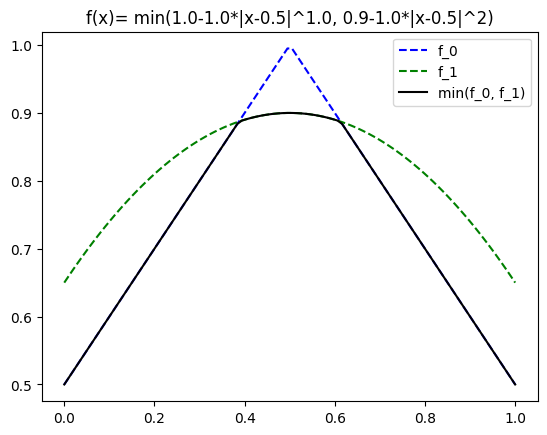

In [12]:
plt.plot(x, y_0, '--', c='blue')
plt.plot(x, y_1, '--', c='green')
plt.plot(x, y_2, '-', c='k')
plt.legend(['f_0', 'f_1', 'min(f_0, f_1)'])
plt.title('f(x)= min({}-{}*|x-{}|^{}, {}-{}*|x-{}|^{})'.format(f_0.d, f_0.c, f_0.a, f_0.b, f_1.d, f_1.c, f_1.a, f_1.b))